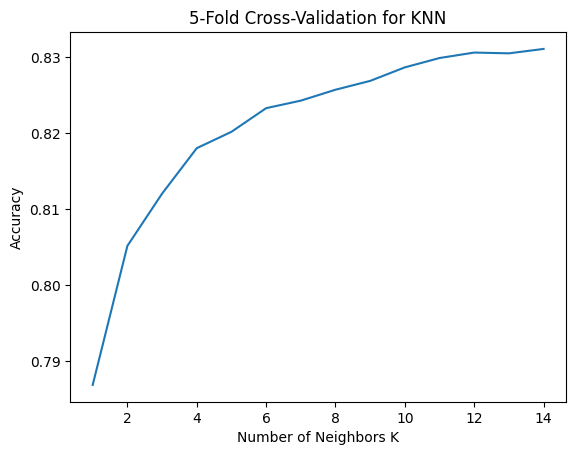

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from sklearn.svm import SVC 
from sklearn.preprocessing import LabelEncoder
# load data in LibSVM sparse data format
X, y = load_svmlight_file('a9a.txt')
X_test, y_test = load_svmlight_file('a9a.t')

# print(X_test[0])

# split data into train and validation sets
seed = 6
val_size = 0.1
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=seed)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

#Setting base accuracy 

k_values = range(1, 15)

# Calculate 5-fold cross-validation accuracy for each k value
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train.ravel(), cv=5)
    cv_scores.append(np.mean(scores))
    
# Plot the results
plt.plot(k_values, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('5-Fold Cross-Validation for KNN')
plt.show()

# # fit model on training data
# # for simplicity we fit based on default values of hyperparameters
# model = XGBClassifier()
# model.fit(X_train, y_train)
# # make predictions for test data
# y_pred = model.predict(X_test)
# predictions = [round(value) for value in y_pred]
# # evaluate predictions
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [24]:
knc = KNeighborsClassifier(n_neighbors=14)
knc.fit(X_train, y_train.ravel())
knc.score(X_test, y_test)

0.8388919599533198

In [25]:

param_grid=[{'n_estimators':[100,200],
             'max_depth':[3,4,5],
             'lambda':[1,5,10],
             'learning_rate':[0.05,0.15],
             'objective':['binary:logistic']
            },]
             
#             'gamma':['scale',1,0.1,0.01,0.001,0.0001],
#             'kernel':['rbf']}
           

optimal_params=GridSearchCV(
        XGBClassifier(random_state=42),
        param_grid,
        cv=5,
        scoring='accuracy',
        verbose=0
    )


optimal_params.fit(X_train,y_train)
print(optimal_params.best_params_)



{'lambda': 1, 'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 200, 'objective': 'binary:logistic'}


In [26]:
# model = XGBClassifier(lambda=1,learning_rate=0.15,max_depth=4,n_estimators= 200, objective = binary:logistic)
# model = XGBClassifier(optimal_params.best_params_)
# model.fit(X_train, y_train)
# optimal_params.fit(X_train, y_train)
# # make predictions for test data
model =optimal_params.best_estimator_
model.fit(X_train, y_train)
# optimal_params.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
predictions_train = [round(value) for value in y_pred_train]
# evaluate predictions
accuracy_train = accuracy_score(y_train, predictions_train)
print("Accuracy for training data: %.2f%%" % (accuracy_train * 100.0))

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy for training data: 86.23%
Accuracy: 85.23%
